In [ ]:
# Python Project Template
# Remember to df.to_csv("periodic_backup.csv")   OFTEN!!!
# df.to_csv("auto_data_uk.csv")

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("Numpy version: "+np.__version__)
print("sklearn version: "+sklearn.__version__)

Numpy version: 1.22.4
sklearn version: 1.2.1


In [ ]:
 df = pd.read_csv('nfl_draft.csv')
 df.sample(5)
 df.info()

,column_a,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
7892,1986Nick Miller,MillNi20,1986,5,127,CLE,Nick Miller,No,LB,LB,1,22.0,1987.0,0,0,0,1.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arkansas,NaN
4622,1997Mike Logan,LogaMi20,1997,2,50,JAX,Mike Logan,No,DB,DB,11,23.0,2006.0,0,0,1,19.0,7.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,5.0,4.5,West Virginia
693,2013Kenjon Barner,BarnKe00,2013,6,182,CAR,Kenjon Barner,No,RB,RB,1,24.0,2016.0,0,0,0,1.0,0.0,29.0,NaN,NaN,NaN,NaN,NaN,57.0,252.0,2.0,12.0,34.0,0.0,NaN,NaN,NaN,Oregon
2571,2005Chris Spencer,SpenCh21,2005,1,26,SEA,Chris Spencer,No,C,C,25,23.0,2014.0,0,0,6,37.0,28.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Mississippi
2207,2007Legedu Naanee,NaanLe00,2007,5,172,SDG,Legedu Naanee,No,WR,WR,14,24.0,2012.0,0,0,2,13.0,8.0,73.0,2.0,2.0,48.0,0.0,0.0,6.0,5.0,0.0,108.0,1232.0,4.0,22.0,NaN,NaN,Boise St.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8435 entries, 0 to 8434
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column_a           8435 non-null   object 
 1   player_id          7216 non-null   object 
 2   year               8435 non-null   int64  
 3   rnd                8435 non-null   int64  
 4   pick               8435 non-null   int64  
 5   tm                 8435 non-null   object 
 6   player             8435 non-null   object 
 7   hof                8435 non-null   object 
 8   pos                8435 non-null   object 
 9   position_standard  8435 non-null   object 
 10  first4av           8435 non-null   int64  
 11  age                7190 non-null   float64
 12  to                 7053 non-null   float64
 13  ap1                8435 non-null   int64  
 14  pb                 8435 non-null   int64  
 15  st                 8435 non-null   int64  
 16  carav              7053 

In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B

df.sample(5)
df.info()


,column_a,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
7520,1987Rod Saddler,SaddRo20,1987,4,90,STL,Rod Saddler,No,DT,DT,22,22.0,1991.0,0,0,3,21.0,21.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.5,Texas A&M,NaN
6157,1991Aaron Craver,CravAa00,1991,3,60,MIA,Aaron Craver,No,RB,RB,10,22.0,1999.0,0,0,4,19.0,3.0,103.0,0.0,2.0,0.0,0.0,0.0,243.0,966.0,10.0,170.0,1364.0,4.0,NaN,NaN,Fresno St.,NaN
3382,2002Deion Branch,BranDe00,2002,2,65,NWE,Deion Branch,No,WR,WR,33,23.0,2012.0,0,0,8,52.0,40.0,140.0,0.0,0.0,0.0,0.0,0.0,8.0,33.0,0.0,518.0,6644.0,39.0,23.0,NaN,NaN,Louisville
5573,1993Coleman Rudolph,RudoCo20,1993,2,36,NYJ,Coleman Rudolph,No,DE,DE,6,22.0,1996.0,0,0,0,6.0,0.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3981,2000James Whalen,WhalJa00,2000,5,157,TAM,James Whalen,No,TE,TE,1,22.0,2003.0,0,0,0,1.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,152.0,0.0,16.0,NaN,NaN,Kentucky


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8435 entries, 0 to 8434
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column_a           8435 non-null   object 
 1   player_id          7216 non-null   object 
 2   year               8435 non-null   int64  
 3   rnd                8435 non-null   int64  
 4   pick               8435 non-null   int64  
 5   tm                 8435 non-null   object 
 6   player             8435 non-null   object 
 7   hof                8435 non-null   object 
 8   pos                8435 non-null   object 
 9   position_standard  8435 non-null   object 
 10  first4av           8435 non-null   int64  
 11  age                7190 non-null   float64
 12  to                 7053 non-null   float64
 13  ap1                8435 non-null   int64  
 14  pb                 8435 non-null   int64  
 15  st                 8435 non-null   int64  
 16  carav              7053 

In [ ]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C
df = df.rename(columns=lambda x: x.strip())

df.rename(columns={'column_a':'unique_player'}, inplace=True)
df.sample(5)

KeyError: ignored

In [ ]:
%time
df.sample(5)
%timeit
# Show size of the dataset
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
df['to'] = df['to'].fillna(0)
df['to'] = df['to'].astype('int64')
print(df.dtypes)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 18.1 µs


,unique_player,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
1748,2009eddie_williams,willed00,2009,7,221,was,eddie_williams,no,rb,rb,3,22.0,2012.0,0,0,0,3.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,1.0,17.0,0.0,NaN,NaN,NaN,NaN
326,2014christian_kirksey,kirkch00,2014,3,71,cle,christian_kirksey,no,lb,lb,8,22.0,2016.0,0,0,2,8.0,8.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,NaN,7,iowa
5278,1995billy_williams,willbi20,1995,7,212,ari,billy_williams,no,wr,wr,0,24.0,1996.0,0,0,0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tennessee
8141,1985carl_zander,zandca20,1985,2,43,cin,carl_zander,no,lb,lb,29,22.0,1991.0,0,0,6,35.0,35.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8.0,tennessee,NaN
7309,1988harry_galbreath,galbha20,1988,8,212,mia,harry_galbreath,no,g,g,41,23.0,1996.0,0,0,9,60.0,31.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tennessee,NaN


Rows and Columns: 
 (8435, 34) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8435 entries, 0 to 8434
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_player      8435 non-null   object 
 1   player_id          7216 non-null   object 
 2   year               8435 non-null   int64  
 3   rnd                8435 non-null   int64  
 4   pick               8435 non-null   int64  
 5   tm                 8435 non-null   object 
 6   player             8435 non-null   object 
 7   hof                8435 non-null   object 
 8   pos                8435 non-null   object 
 9   position_standard  8435 non-null   object 
 10  first4av           8435 non-null   int64  
 11  age                7190 non-null   float64
 12  to                 7053 non-null   float64
 13  ap1                8435 non-null   int64  
 14  pb                 8435 non-null   int64  
 15  st                 8435 non-null   int6

In [ ]:
pd.value_counts(df.dtypes)

float64    18
object      9
int64       7
dtype: int64

In [ ]:
df.nunique().to_frame()
df.dtypes.to_frame()
df['position_standard'].value_counts()


,0
unique_player,8421
player_id,7214
year,31
rnd,12
pick,336
tm,35
player,8230
hof,1
pos,25
position_standard,15


,0
unique_player,object
player_id,object
year,int64
rnd,int64
pick,int64
tm,object
player,object
hof,object
pos,object
position_standard,object


db    1569
lb    1124
wr    1049
rb     809
de     731
dt     640
t      619
g      542
te     496
qb     398
c      225
k       78
fb      77
p       77
ls       1
Name: position_standard, dtype: int64

In [ ]:
# df.drop(['hof'], axis=1, inplace=True) # only one record of hof = 1, may drop it later


In [ ]:
df.sample(5)

,unique_player,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
7775,1986keith_byars,byarke00,1986,1,10,phi,keith_byars,no,rb,rb,38,22.0,1998,0,1,12,60.0,44.0,189.0,6.0,13.0,119.0,6.0,1.0,865.0,3109.0,23.0,610.0,5661.0,31.0,NaN,NaN,ohio_st.,NaN
1776,2009clinton_mcdonald,mcdocl99,2009,7,249,cin,clinton_mcdonald,no,dt,dt,11,22.0,2016,0,0,1,18.0,1.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN
5669,1993chris_gray,graych20,1993,5,132,mia,chris_gray,no,g,g,14,23.0,2007,0,0,10,64.0,7.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5288,1995byron_chamberlain,chamby00,1995,7,222,den,byron_chamberlain,no,te,te,5,23.0,2003,0,1,2,17.0,7.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,2048.0,6.0,4.0,NaN,NaN,missouri
6168,1991steve_jackson,jackst22,1991,3,71,hou,steve_jackson,no,db,db,13,22.0,1999,0,0,1,17.0,17.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,9.0,purdue,NaN


In [ ]:
numerics = ['int16','int32','int64','float64']
#TODO categorical needs encoding --> converting string to integer
catDF = df.select_dtypes(exclude=numerics) 
#TODO normalize the data at some point
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

,unique_player,player_id,tm,player,hof,pos,position_standard,sk,college_univ
0,2015jameis_winston,winsja00,tam,jameis_winston,no,qb,qb,NaN,florida_st.
1,2015marcus_mariota,marima01,ten,marcus_mariota,no,qb,qb,NaN,oregon
2,2015dante_fowler,fowlda00,jax,dante_fowler,no,olb,lb,2.5,florida
3,2015amari_cooper,coopam00,oak,amari_cooper,no,wr,wr,NaN,alabama
4,2015brandon_scherff,schebr00,was,brandon_scherff,no,t,t,NaN,iowa


,year,rnd,pick,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int
0,2015,1,1,13,21.0,2016,0,1,2,13.0,13.0,26.0,540.0,913.0,6722.0,42.0,25.0,86.0,311.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,9,21.0,2016,0,0,2,9.0,9.0,23.0,458.0,725.0,5590.0,42.0,18.0,79.0,516.0,4.0,1.0,41.0,1.0,NaN,NaN
2,2015,1,3,0,21.0,2016,0,0,0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
3,2015,1,4,9,21.0,2016,0,1,1,9.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,3.0,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN
4,2015,1,5,7,23.0,2016,0,0,2,7.0,7.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

(8435, 34)


In [ ]:
df.select_dtypes(include="number").head()

,year,rnd,pick,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int
0,2015,1,1,13,21.0,2016,0,1,2,13.0,13.0,26.0,540.0,913.0,6722.0,42.0,25.0,86.0,311.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,9,21.0,2016,0,0,2,9.0,9.0,23.0,458.0,725.0,5590.0,42.0,18.0,79.0,516.0,4.0,1.0,41.0,1.0,NaN,NaN
2,2015,1,3,0,21.0,2016,0,0,0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
3,2015,1,4,9,21.0,2016,0,1,1,9.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,3.0,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN
4,2015,1,5,7,23.0,2016,0,0,2,7.0,7.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.duplicated(['unique_player'])
df.duplicated().sum()

# # Duplicated Rows?
df[df.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
8430    False
8431    False
8432    False
8433    False
8434    False
Length: 8435, dtype: bool

0

,unique_player,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ


In [ ]:
newdf = df[df['position_standard']=='db']
newdf.sample(5)

,unique_player,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
2849,2004keiwan_ratliff,ratlke20,2004,2,49,cin,keiwan_ratliff,no,db,db,9,23.0,2010,0,0,0,9.0,5.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,5.0,NaN,florida
1157,2011brandon_burton,burtbr00,2011,5,139,min,brandon_burton,no,db,db,1,22.0,2013,0,0,0,1.0,1.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,southern_utah
7637,1987toi_cook,cookto20,1987,8,207,nor,toi_cook,no,db,db,23,22.0,1997,0,0,5,39.0,35.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,0.0,20.0,9.0,stanford,NaN
6946,1989mike_nettles,NaN,1989,7,184,sea,mike_nettles,no,db,db,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,memphis,NaN
5733,1993brock_marion,maribr00,1993,7,196,dal,brock_marion,no,db,db,14,23.0,2004,0,3,10,57.0,14.0,182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install missingno
import missingno as msno

def missing_values(df):
  # # MISSING VALUES
  # print(df.shape)
  # print(df.isna())
  # print(df.isna().sum())

  position_text = df["position_standard"].unique().tolist()
  # # Check for missing values in a single column
  # # df[df['Description'].isna()]

  # # List all rows that are missing a value in this field
  # # df.dropna(subset=['Description'])  

  # # Drop all rows that are missing a value in this field:
  # # df.dropna(subset=['Description'], inplace=True)

  # # b) Missing Values per Sample (Big Holes)


  plt.figure(figsize=(15, 8))
  sns.set_style('whitegrid')

  g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  # # g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
  g.set_xlabel('Column Number')
  g.set_ylabel('Sample_Number')
  g.set_title(str(position_text))

  msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


unique_player           0
player_id            1219
year                    0
rnd                     0
pick                    0
tm                      0
player                  0
hof                     0
pos                     0
position_standard       0
first4av                0
age                  1245
to                      0
ap1                     0
pb                      0
st                      0
carav                1382
drav                 2165
g                    1415
cmp                  7841
pass_att             7841
pass_yds             7841
pass_td              7841
pass_int             7841
rush_att             6789
rush_yds             6789
rush_tds             6789
rec                  6264
rec_yds              6264
rec_tds              6264
tkl                  4324
def_int              6819
sk                   4388
college_univ         3430
dtype: int64


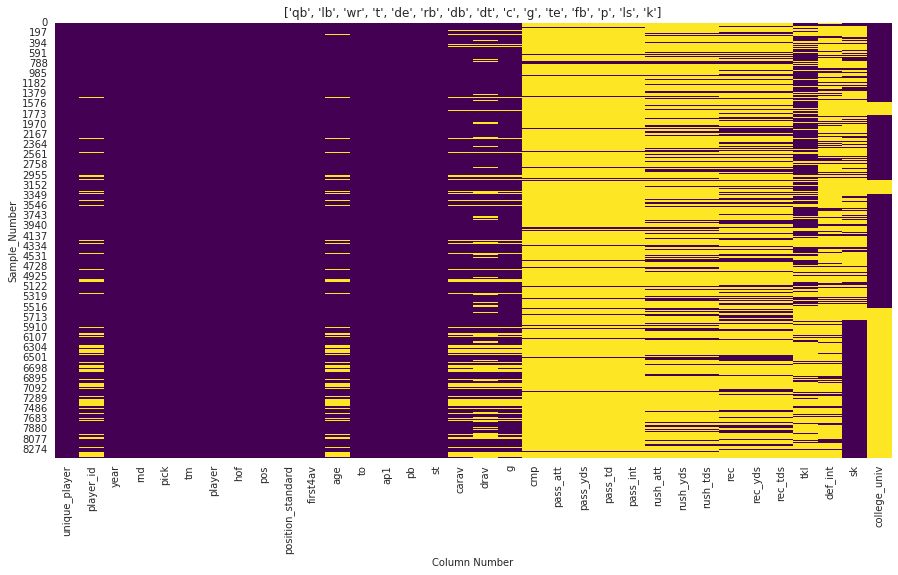

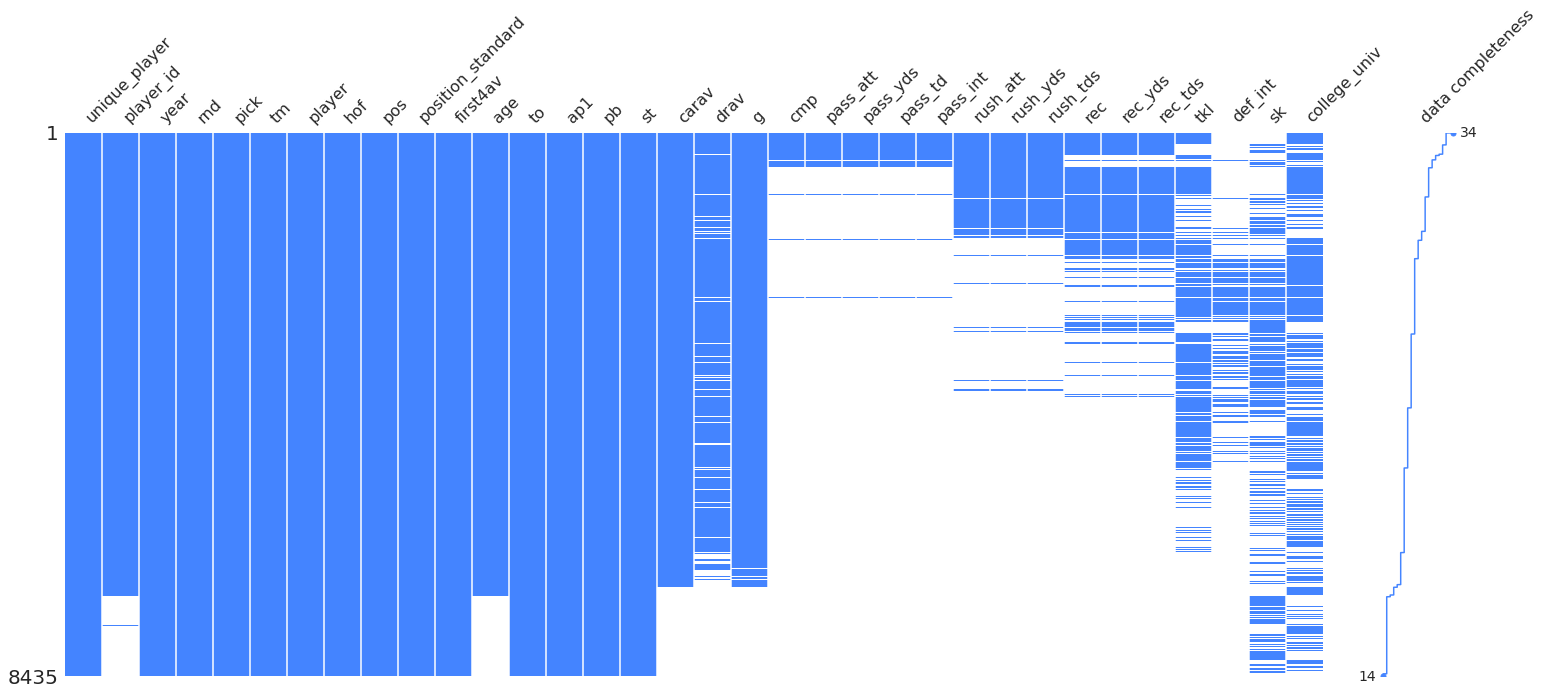

In [ ]:
          missing_values(df)


<ipython-input-94-3f087a5be201>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 8))


""


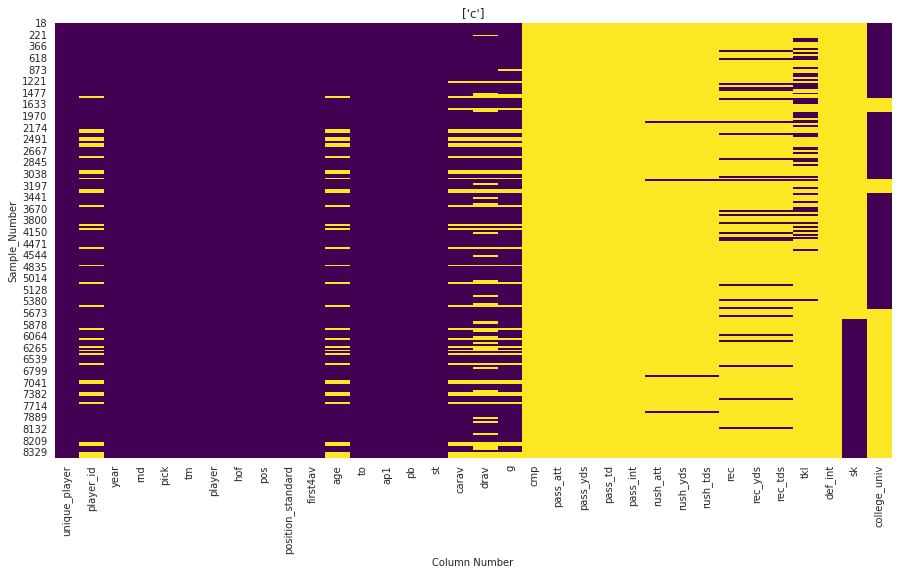

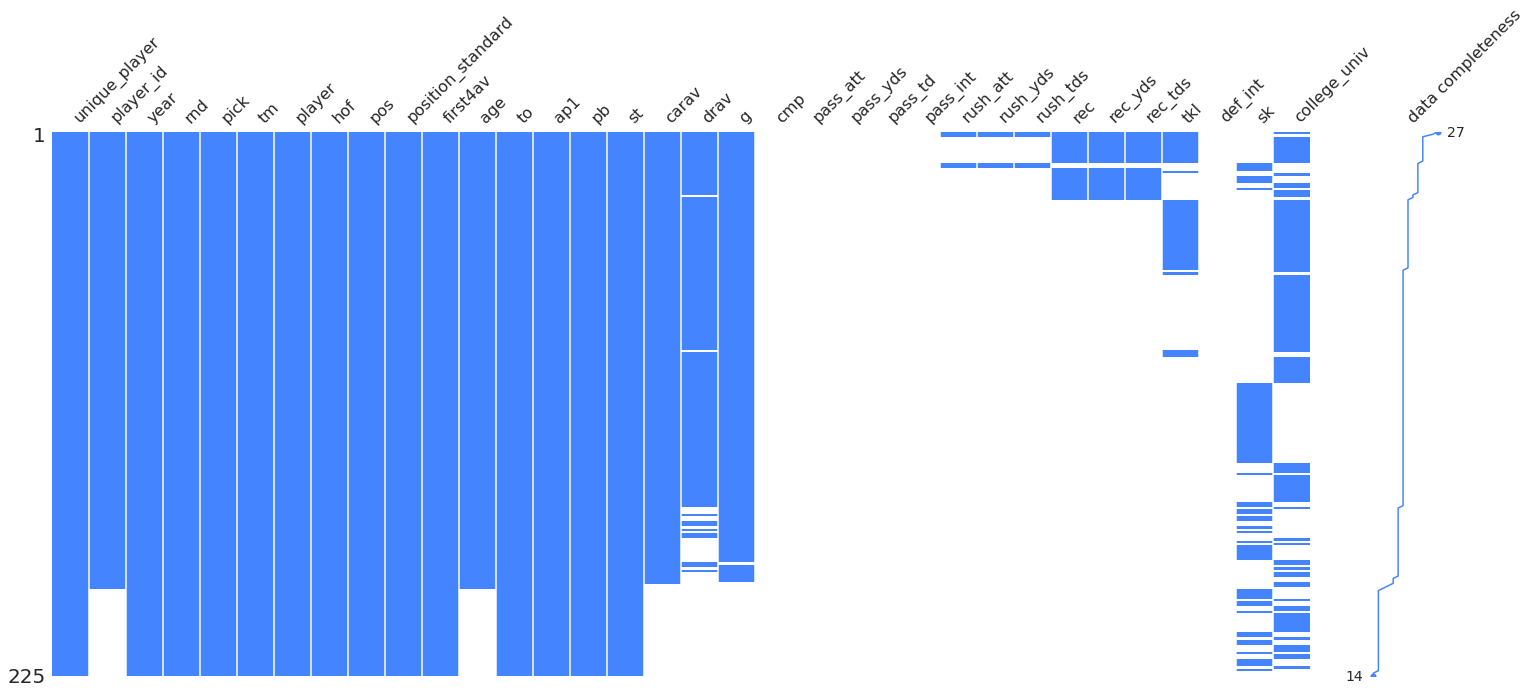

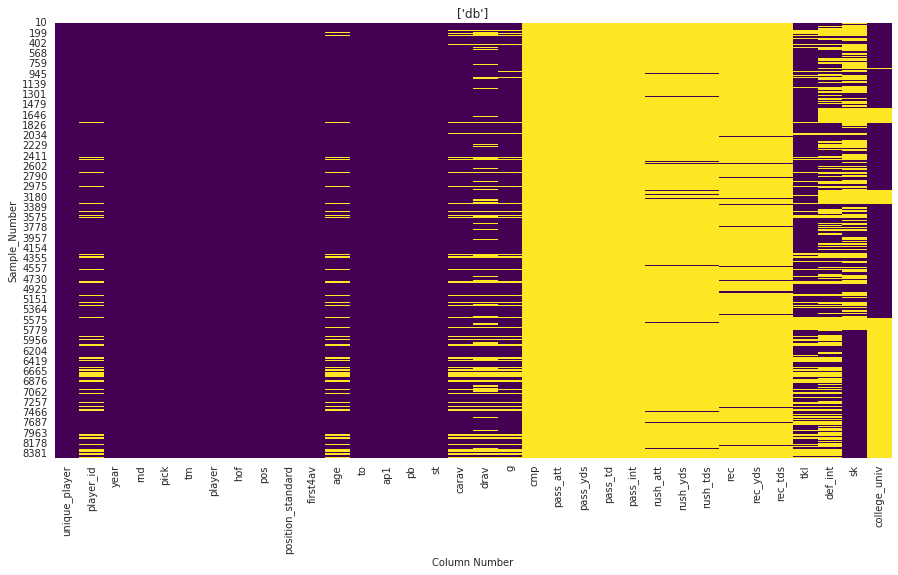

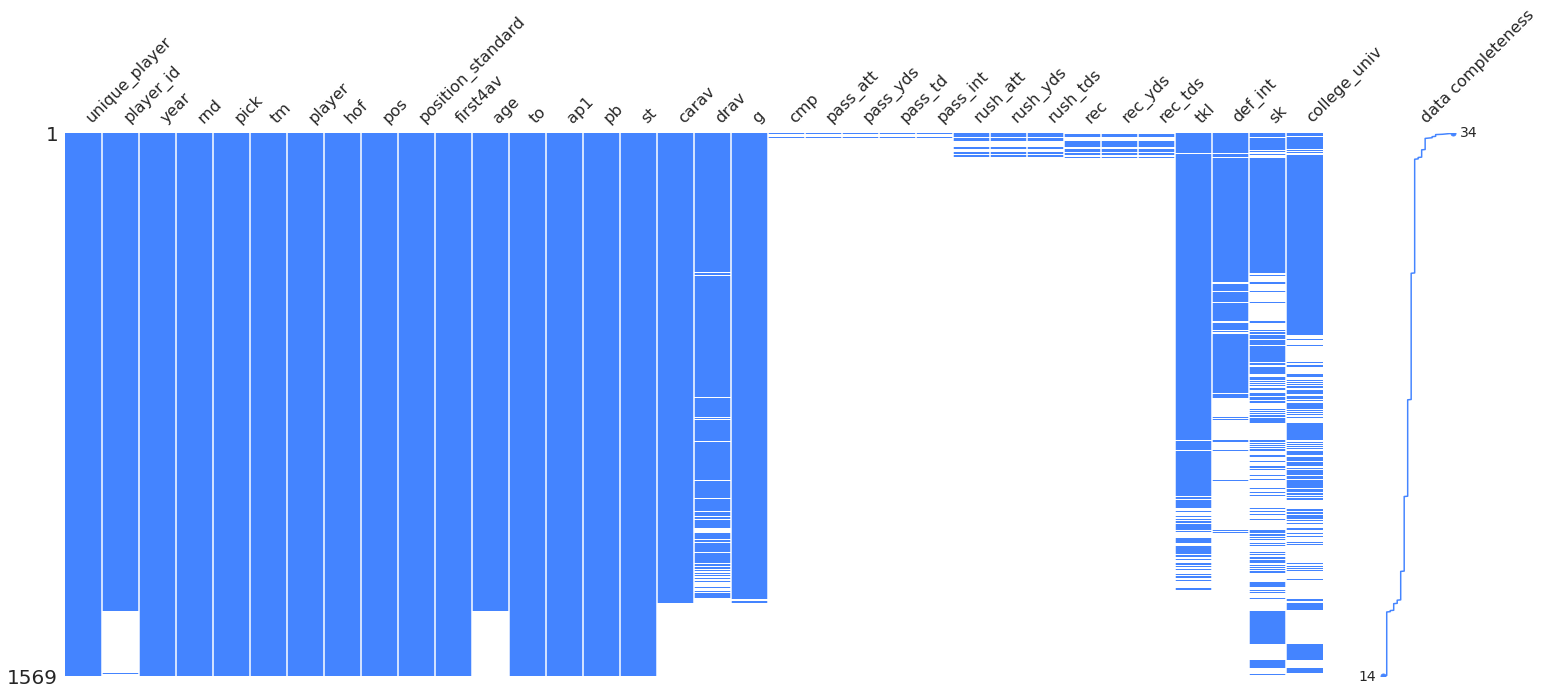

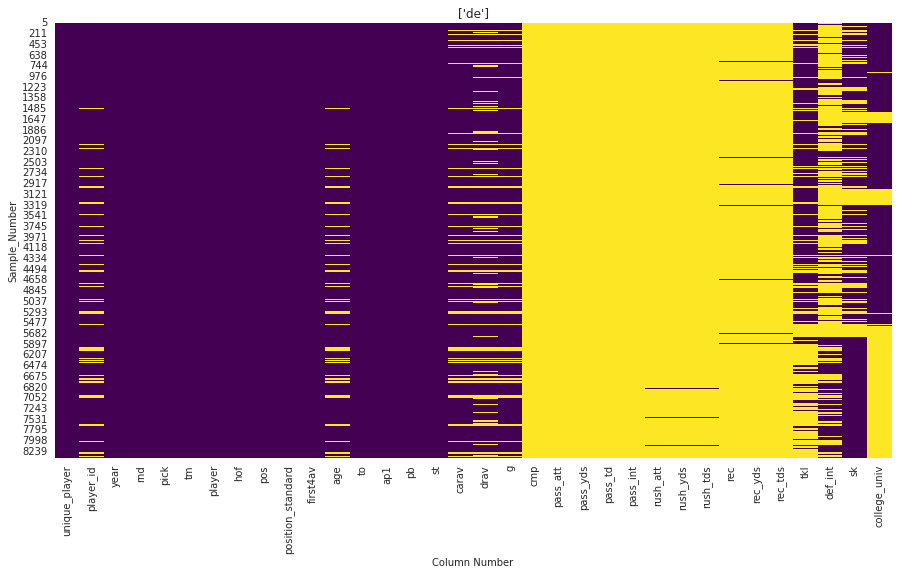

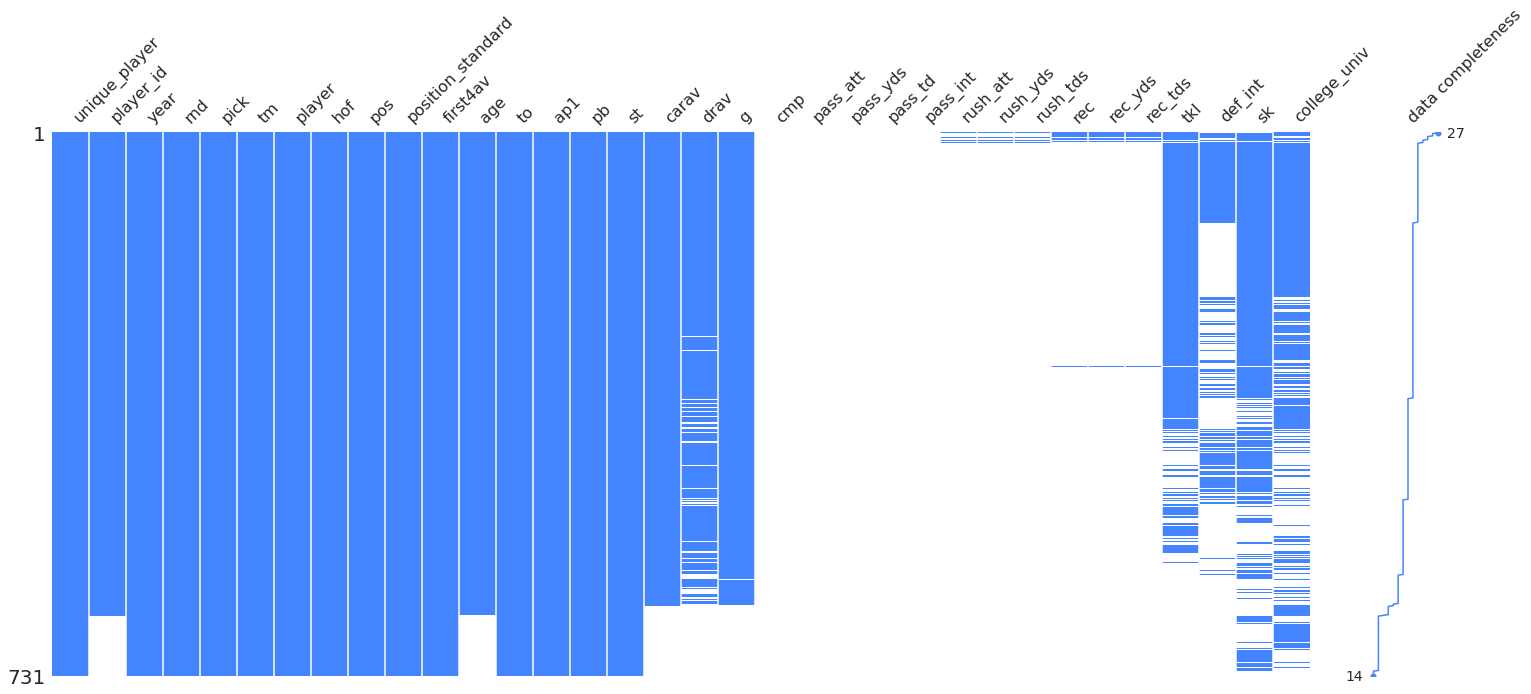

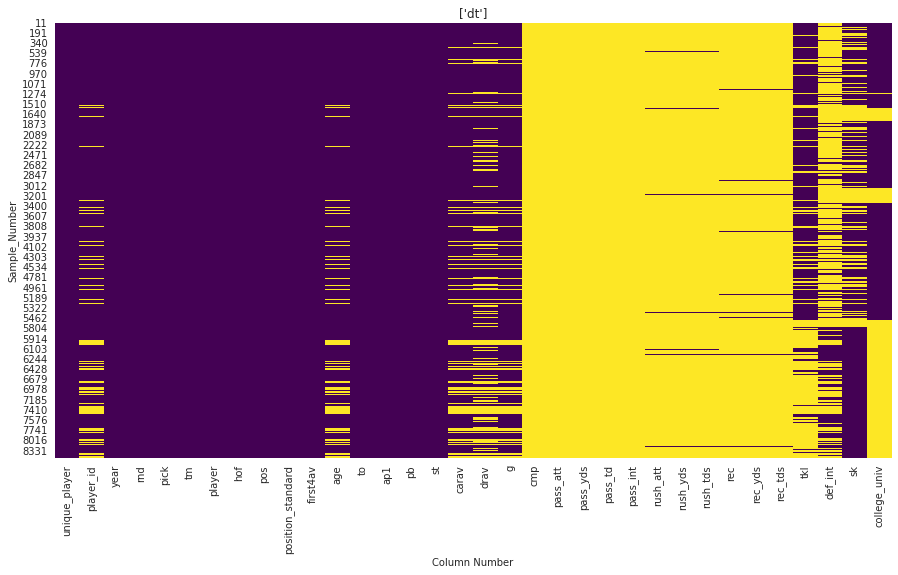

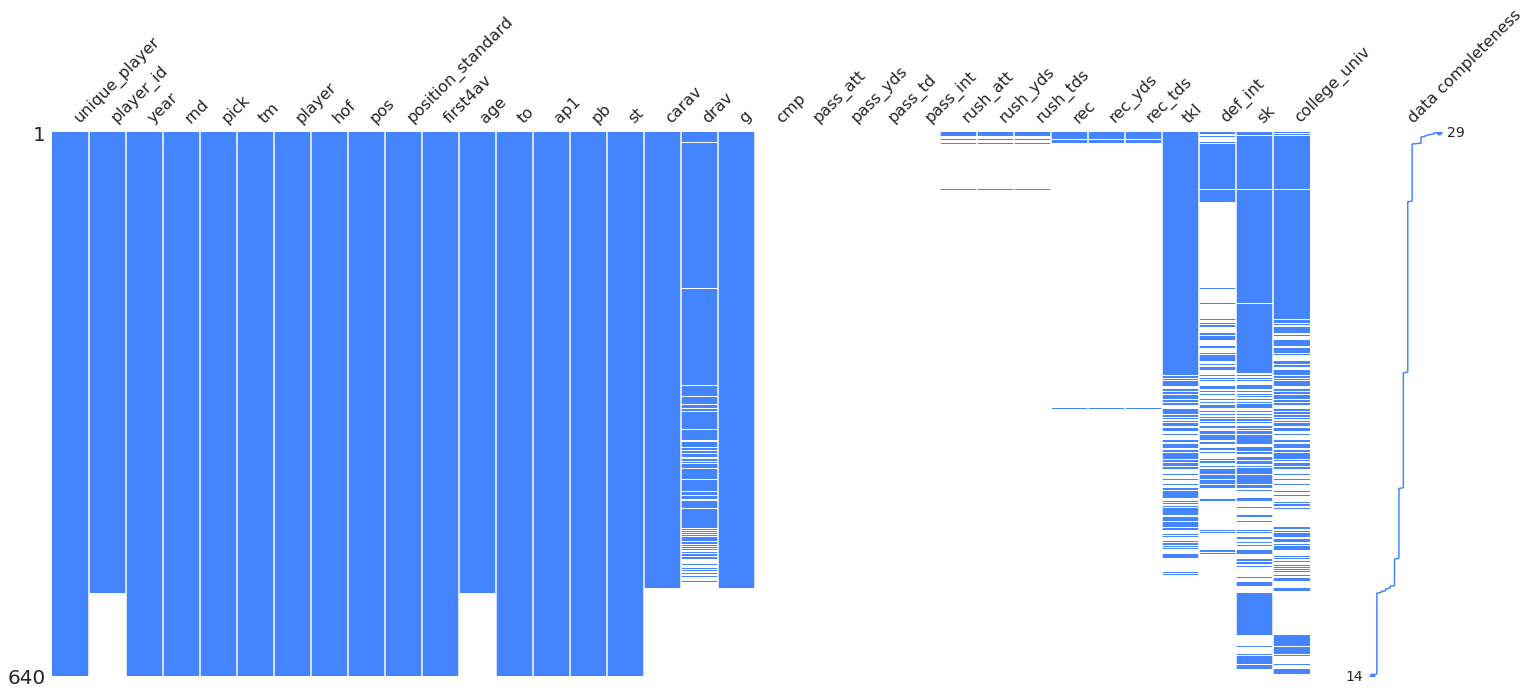

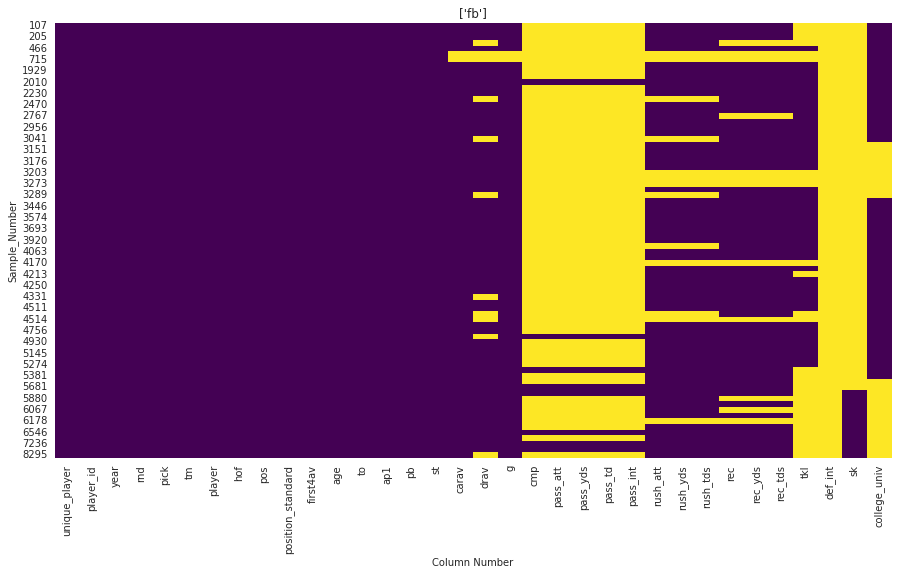

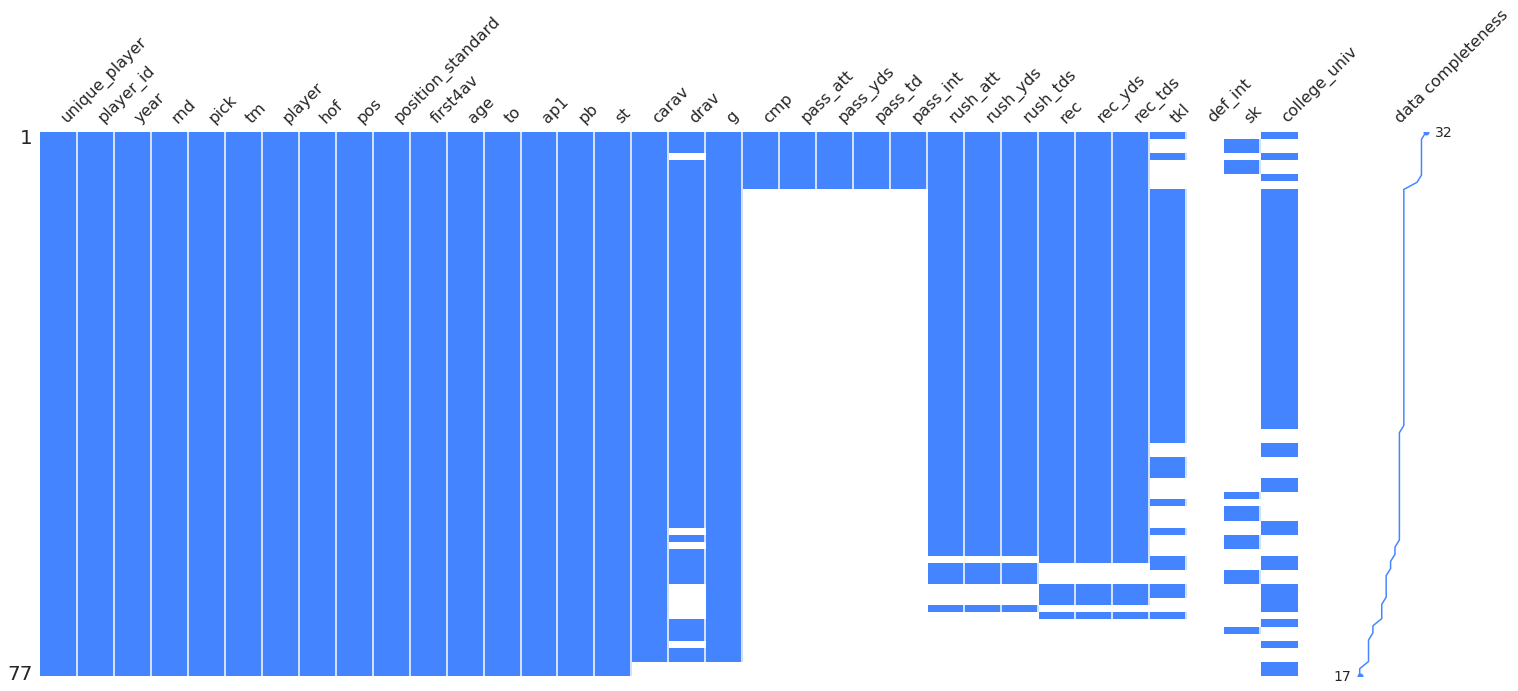

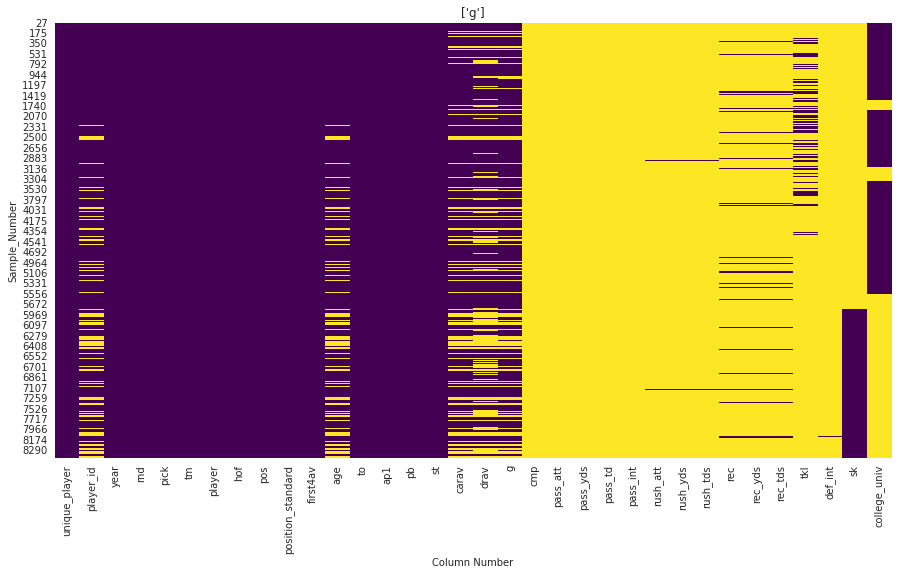

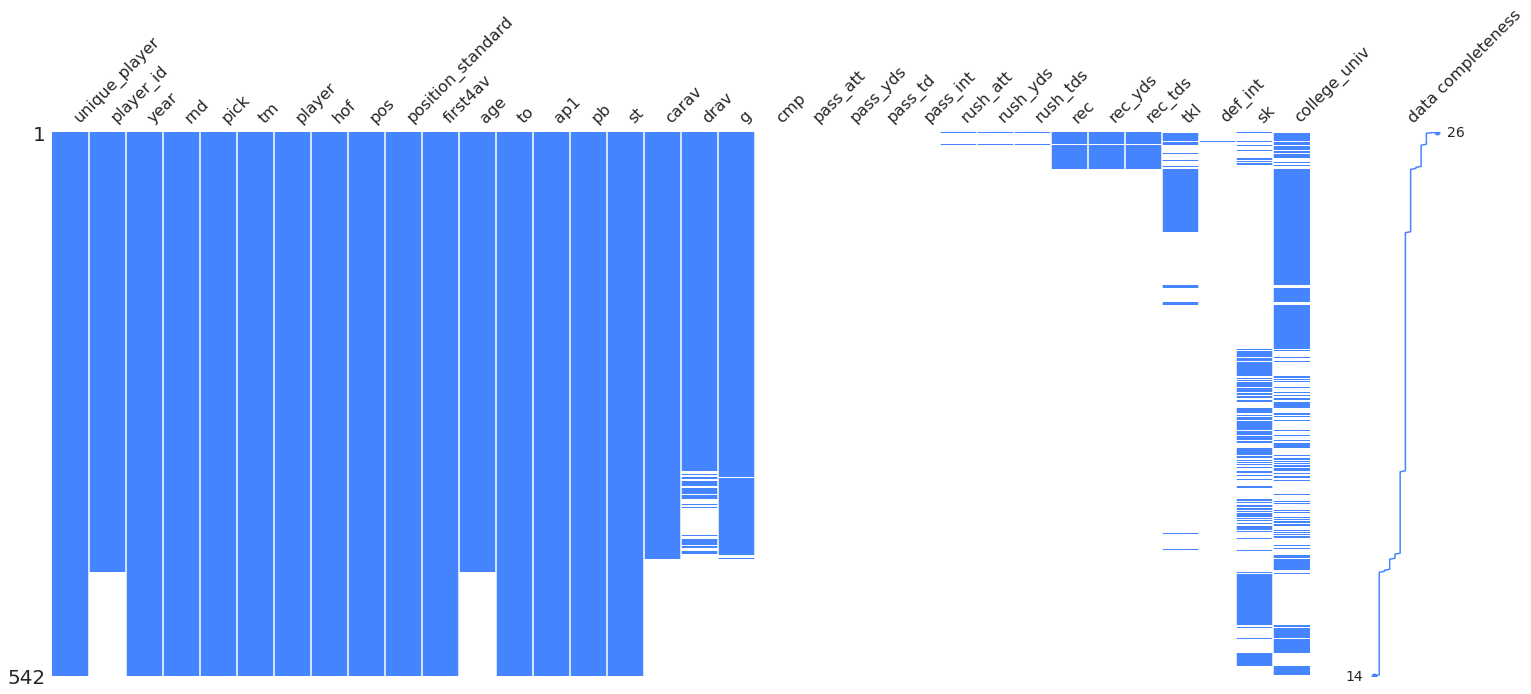

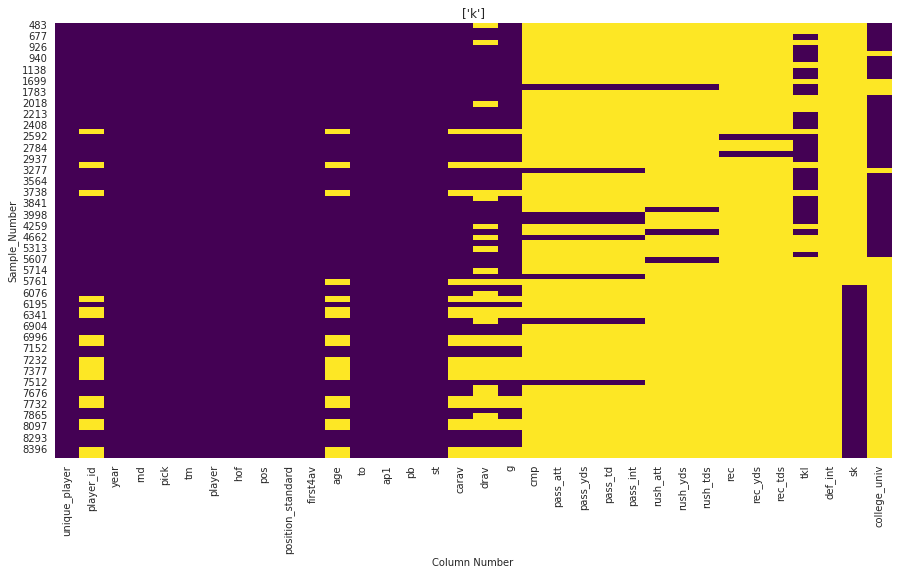

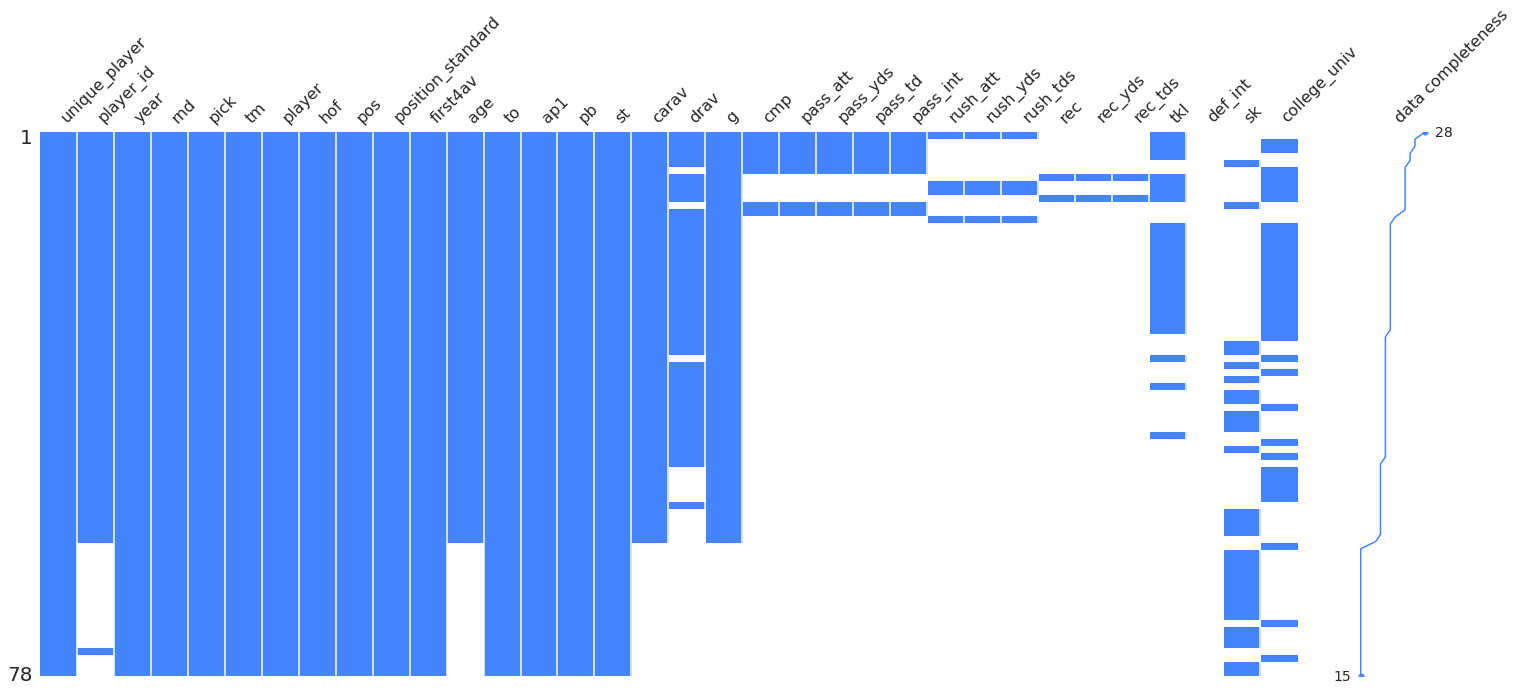

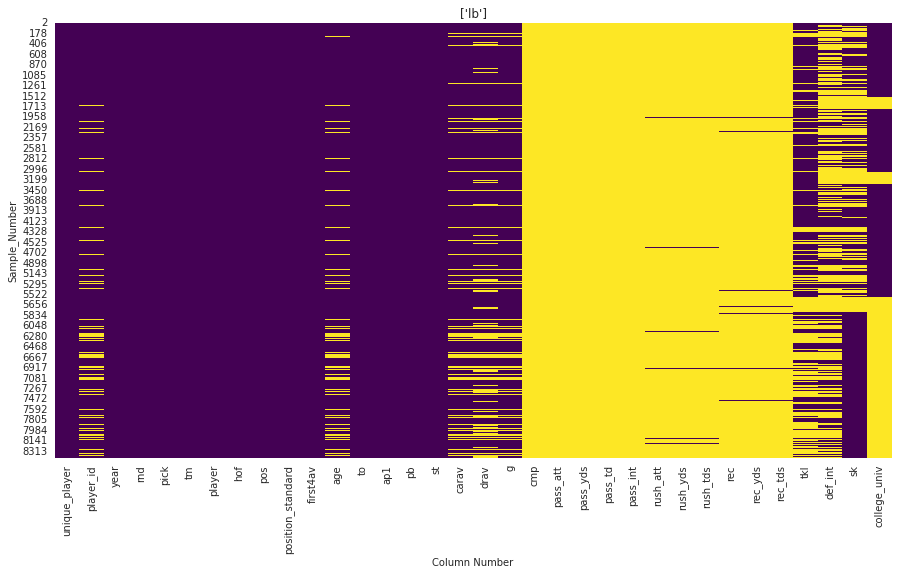

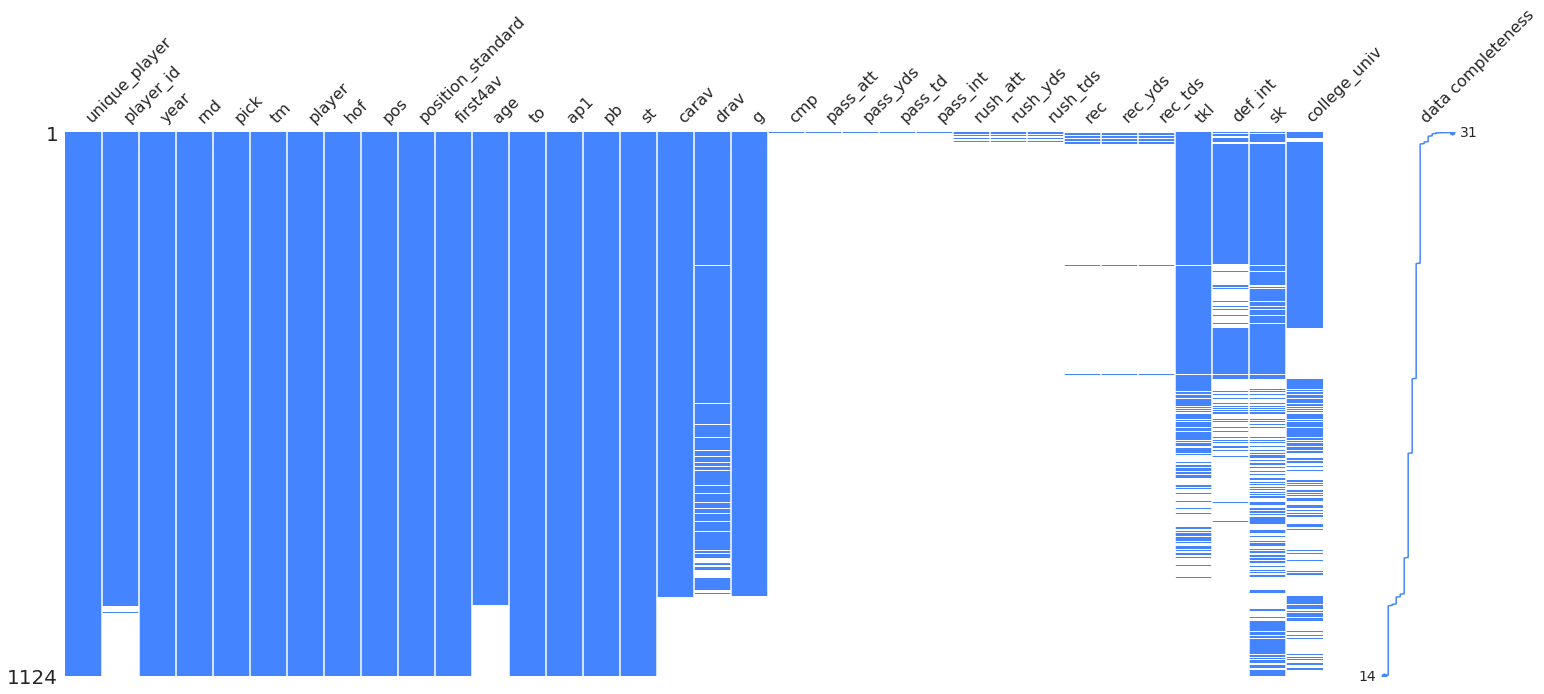

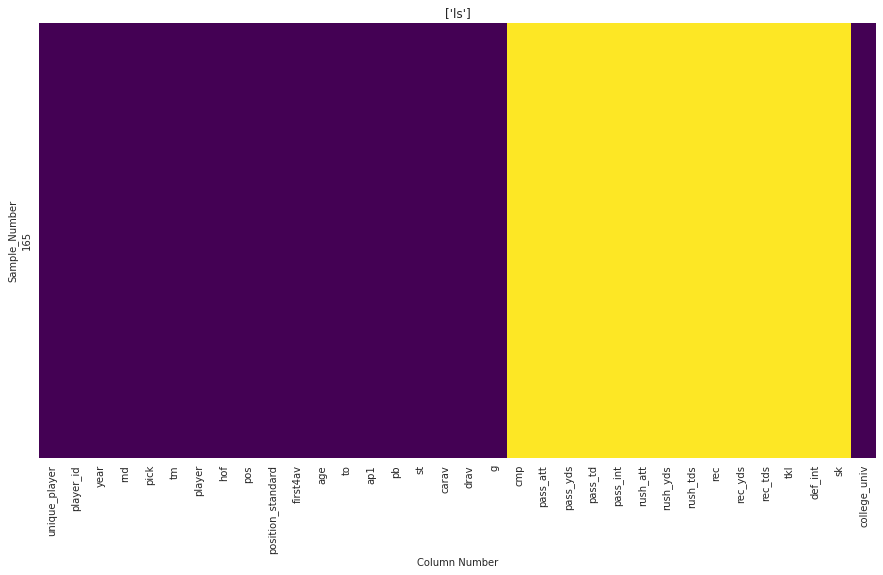

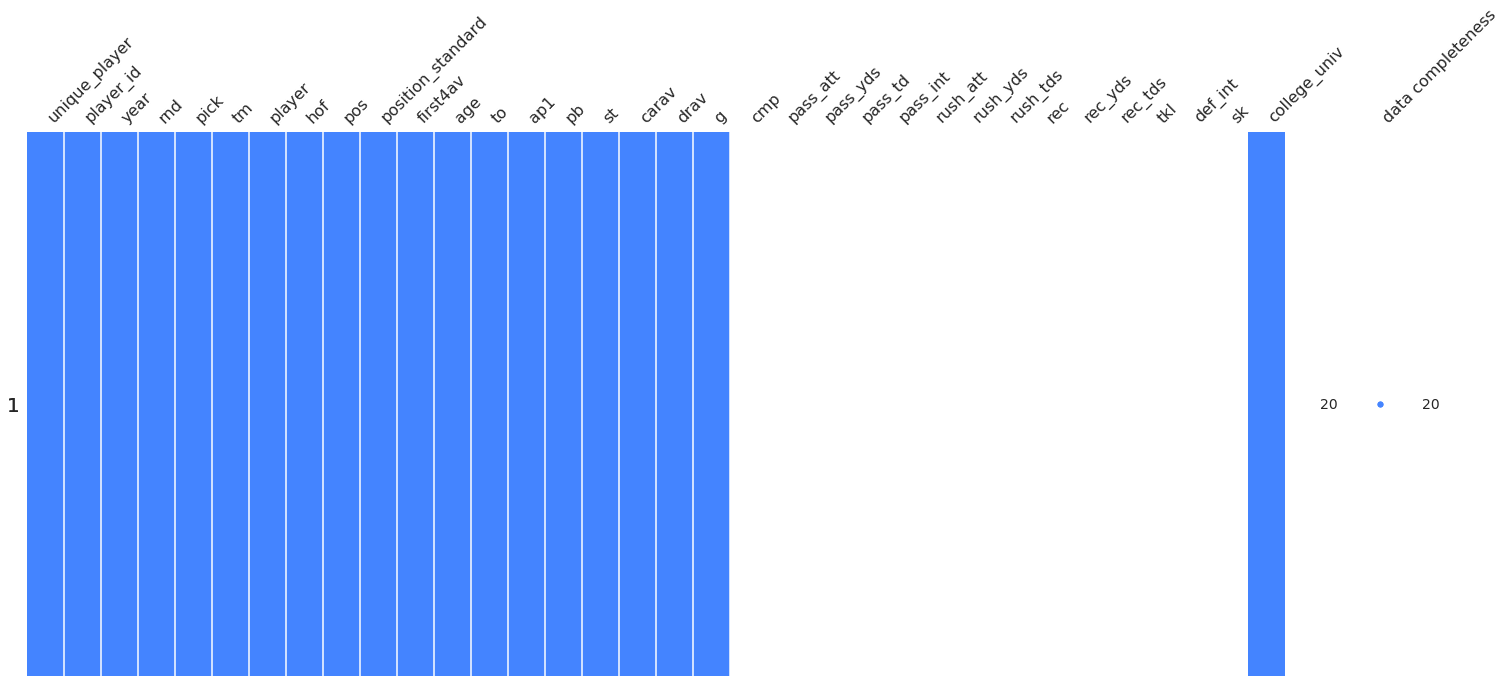

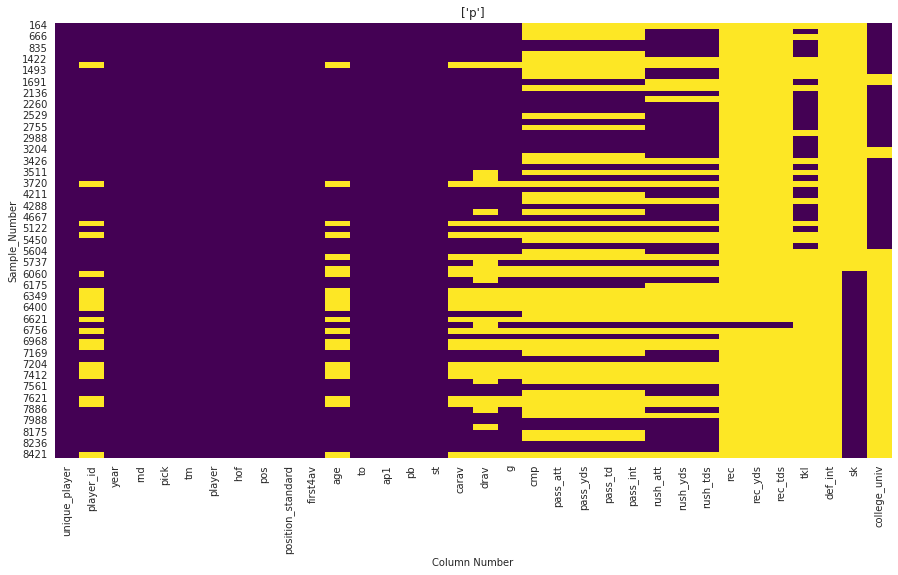

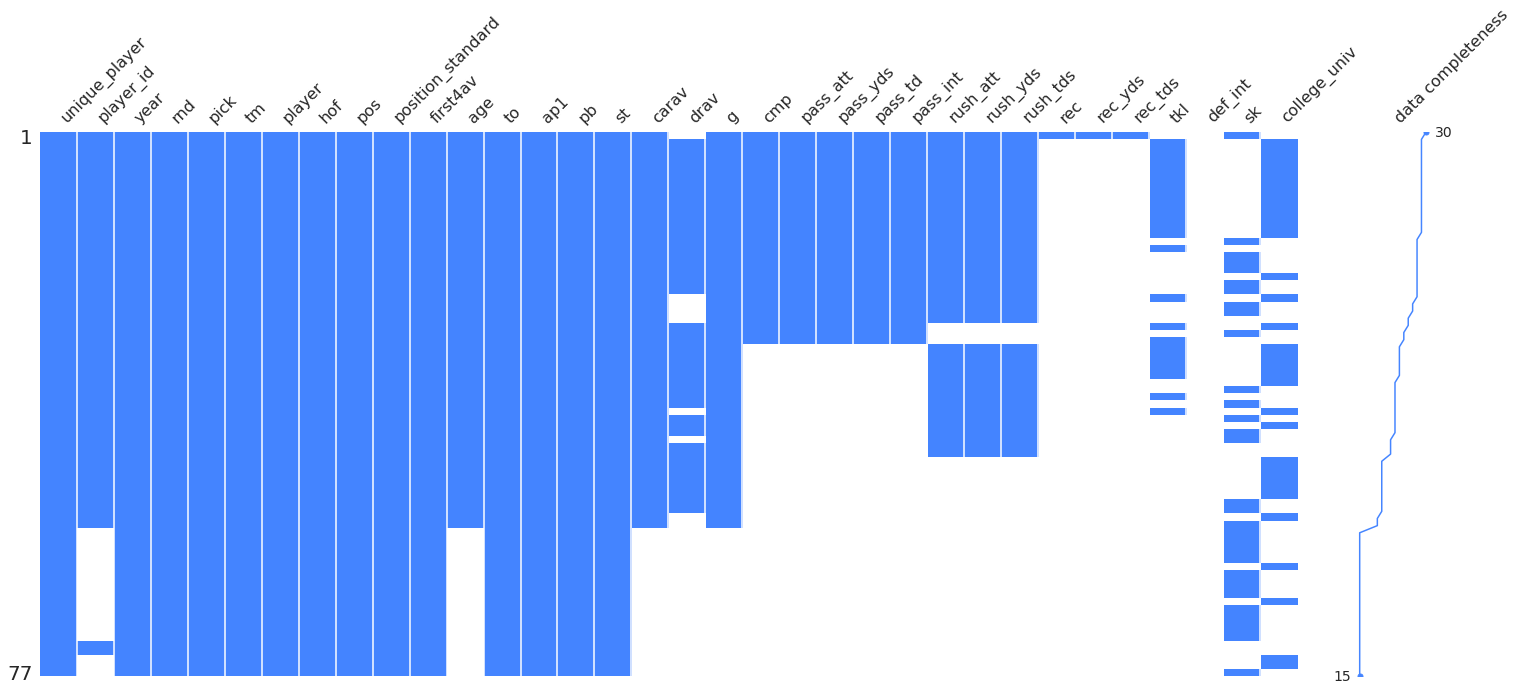

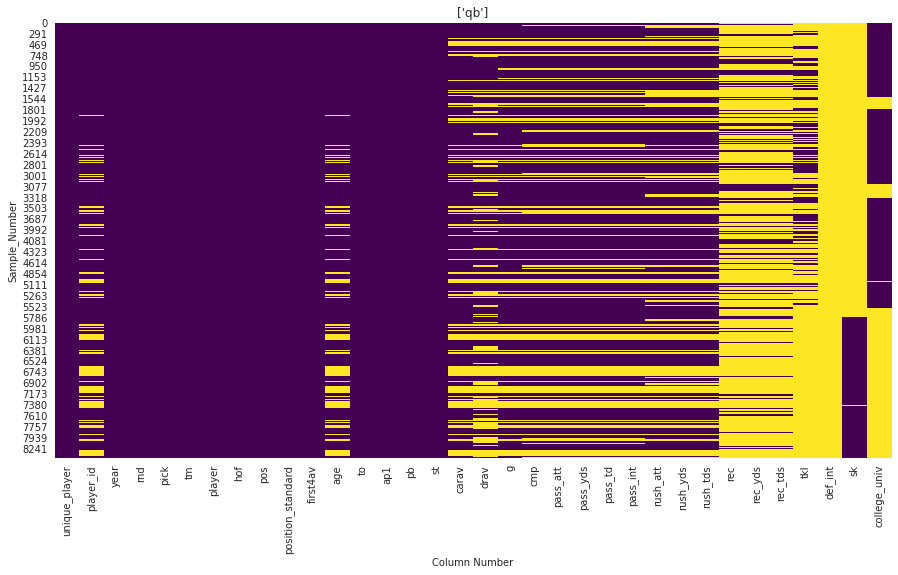

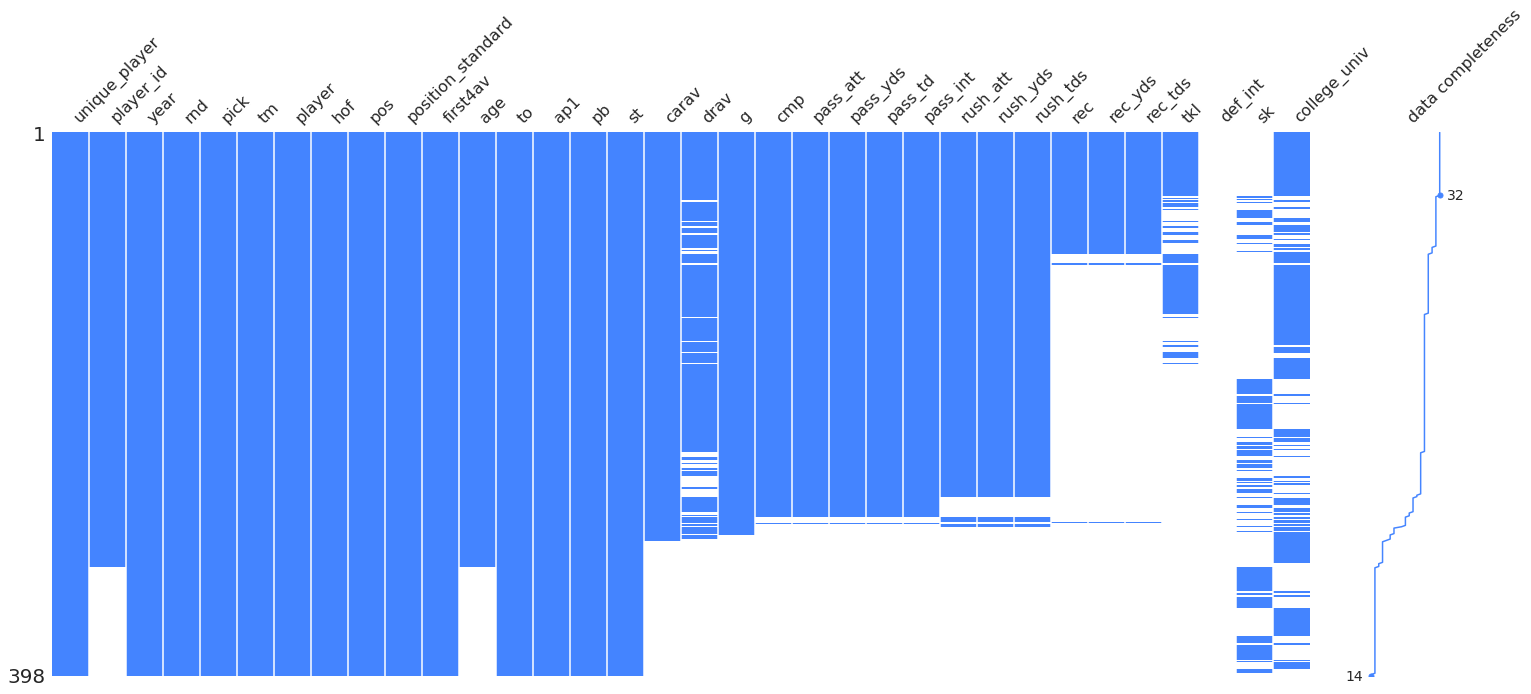

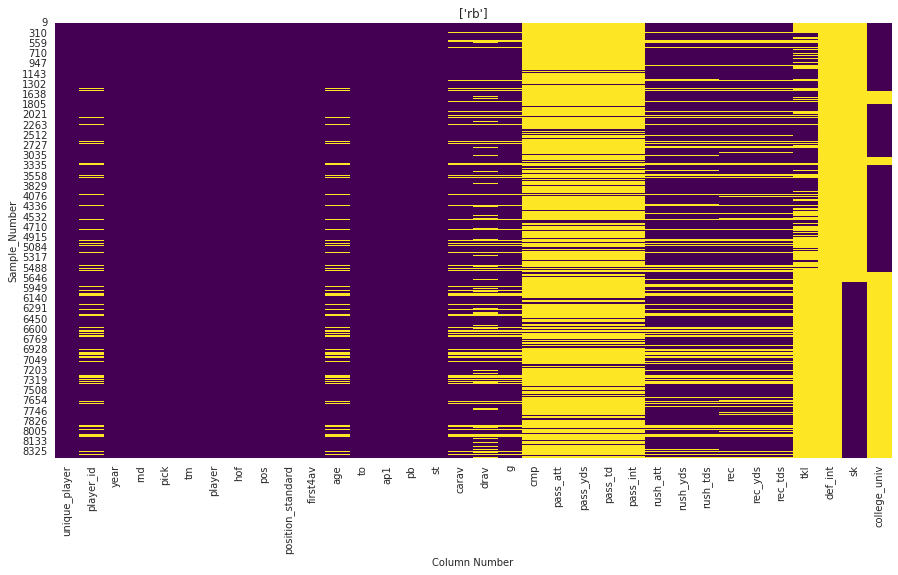

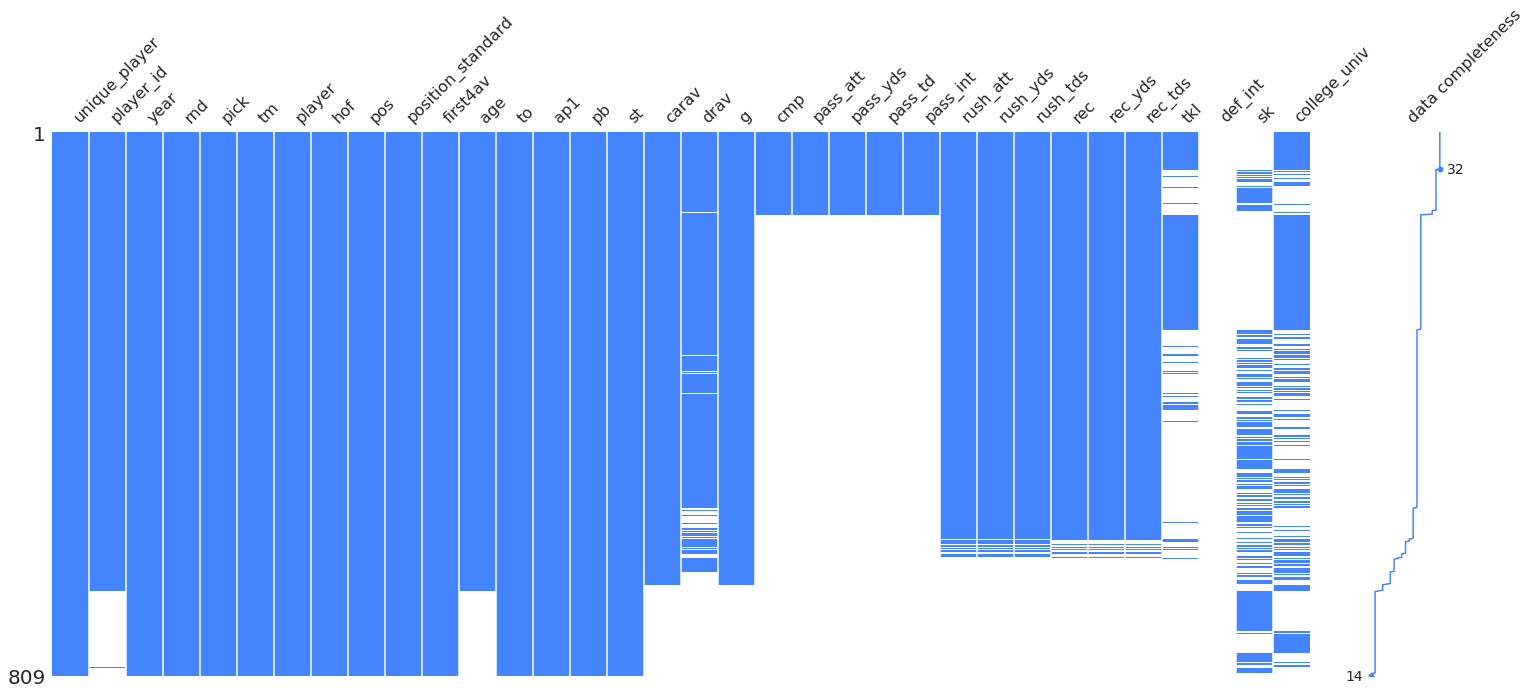

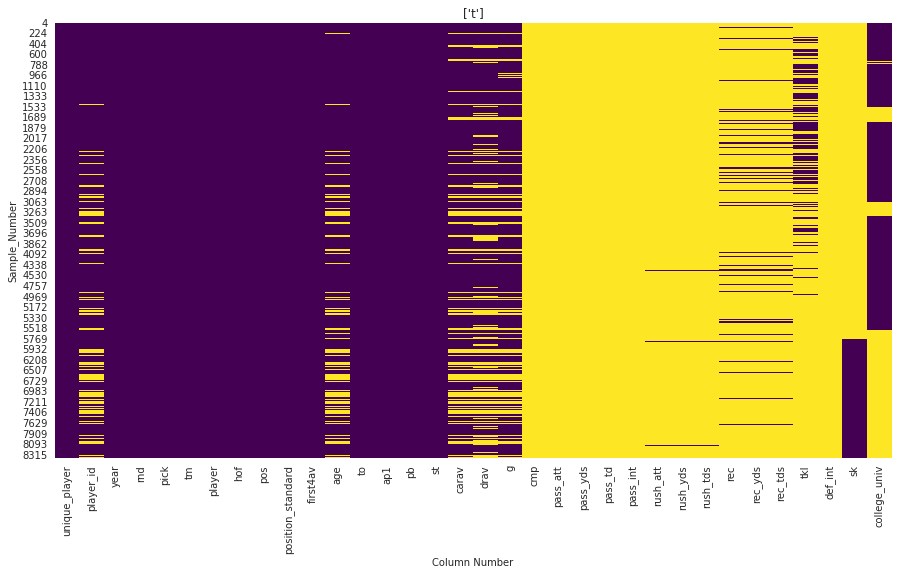

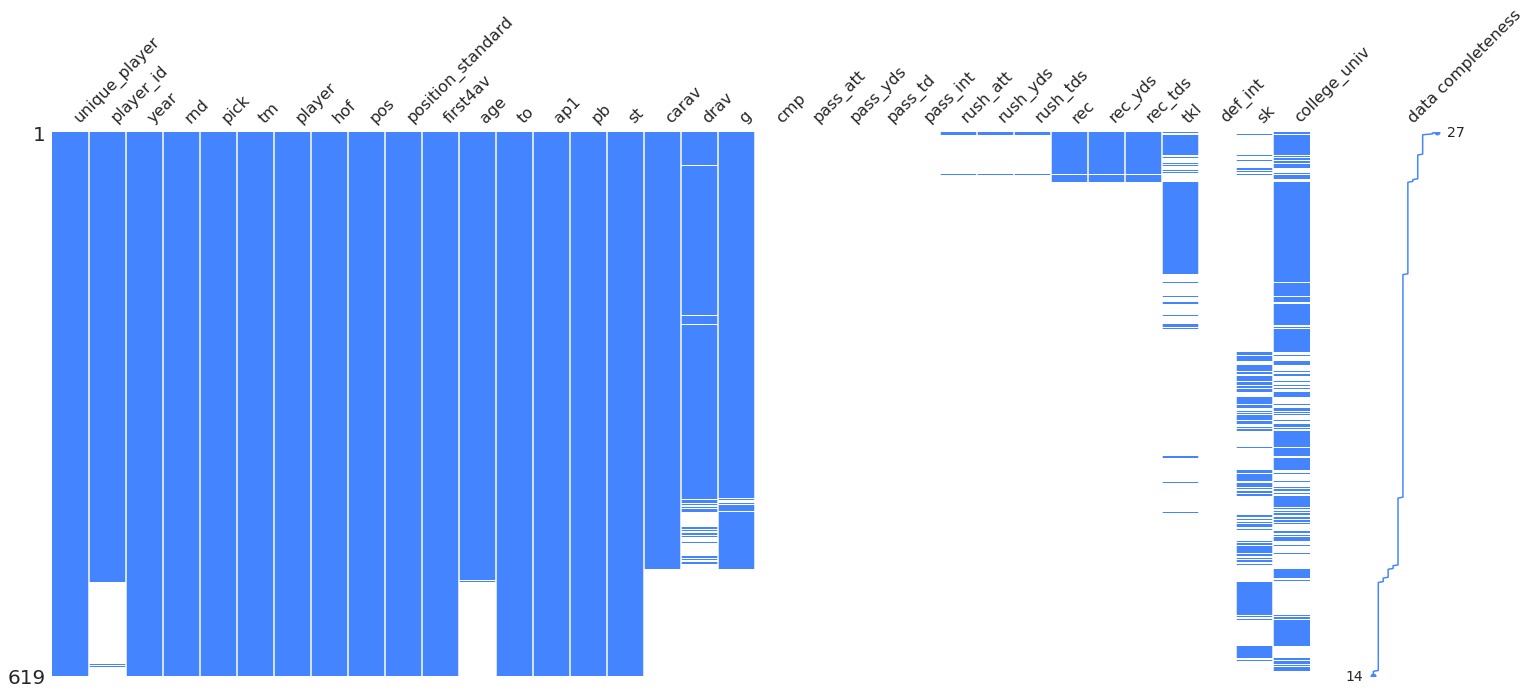

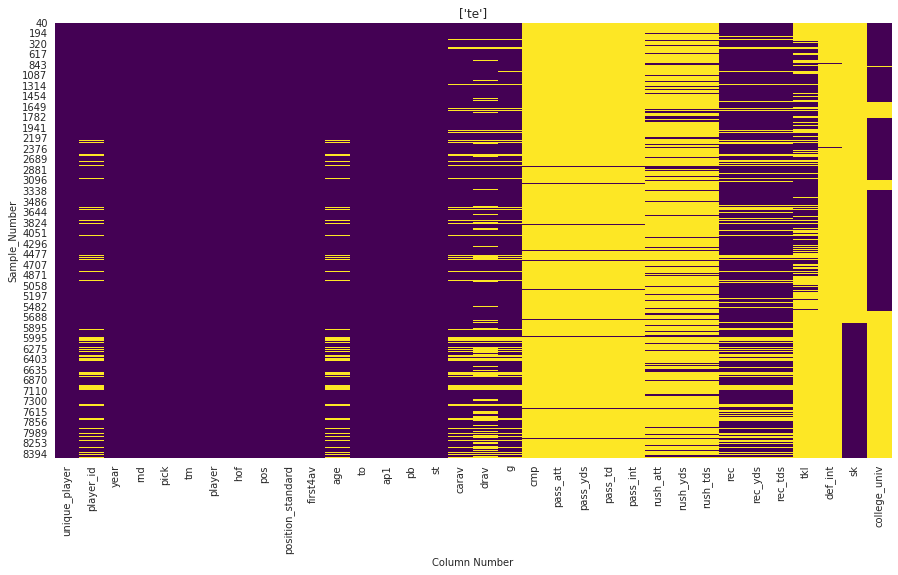

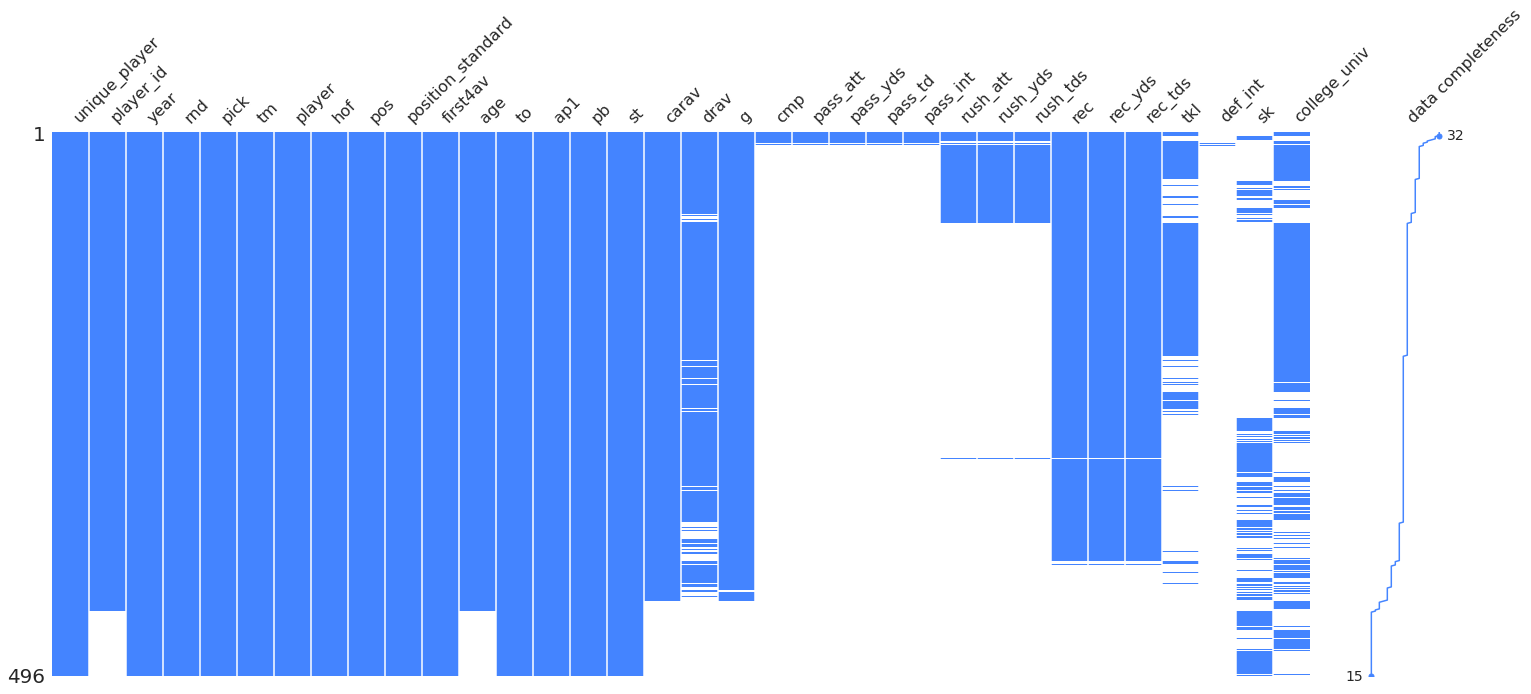

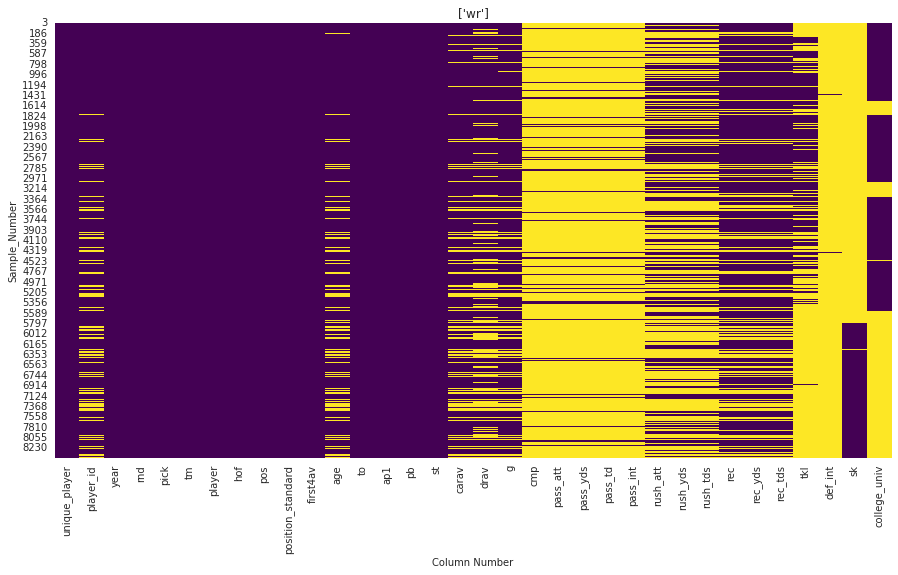

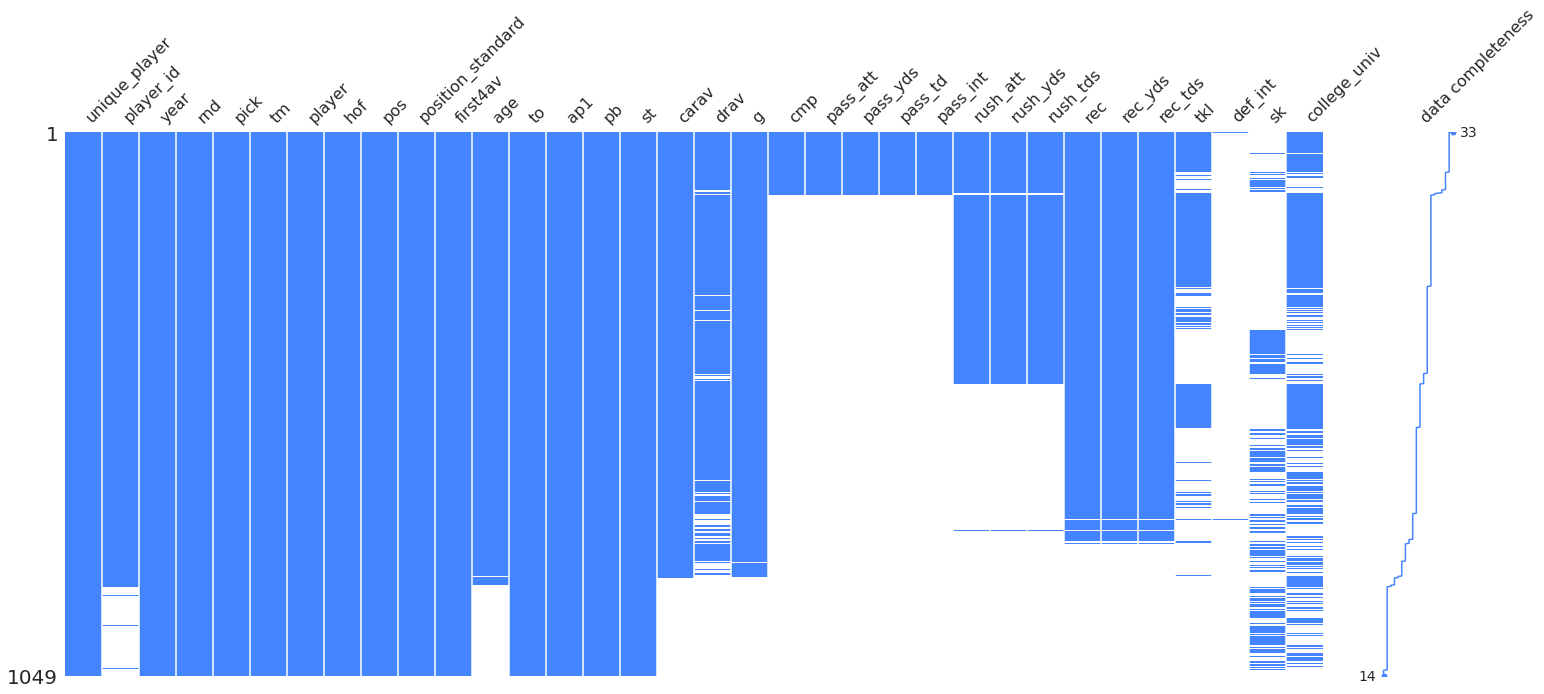

In [ ]:
df.groupby('position_standard').apply(lambda x: missing_values(x))

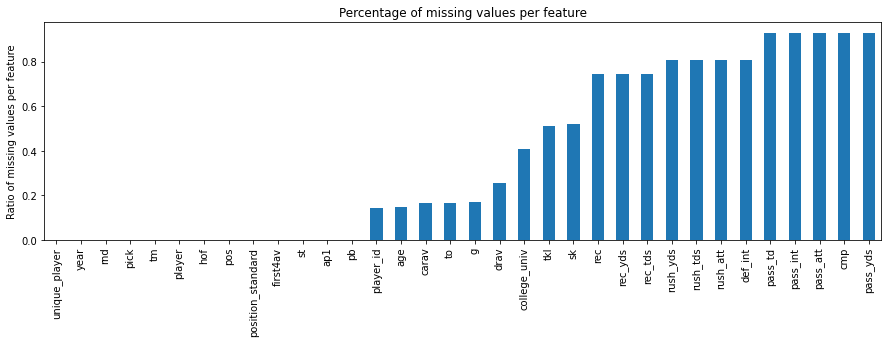

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
# drop any col that is more than 15% empty
df.shape
df = df.dropna(thresh=df.shape[0] * 0.85,axis=1)
df.shape

(8435, 16)

(8435, 16)

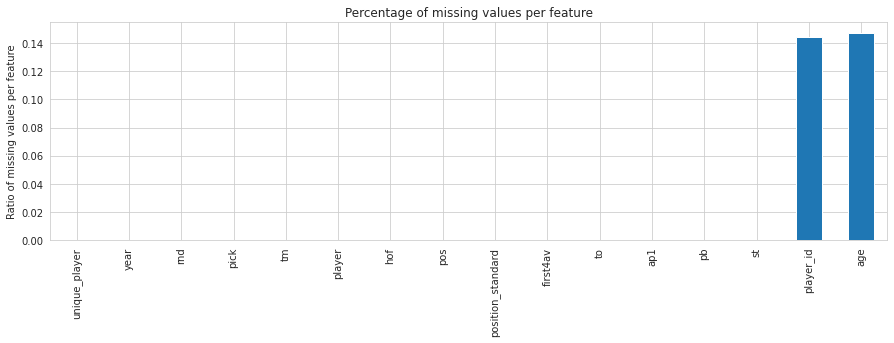

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

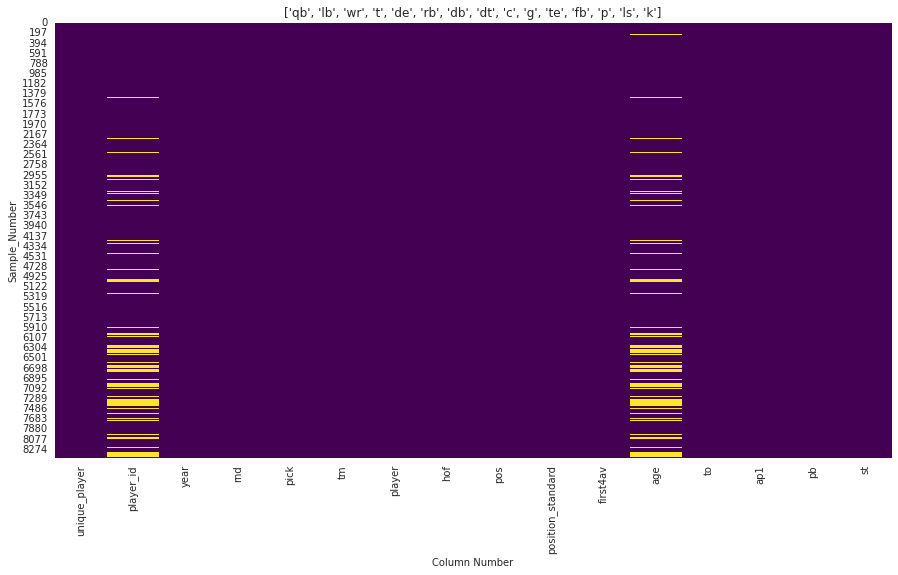

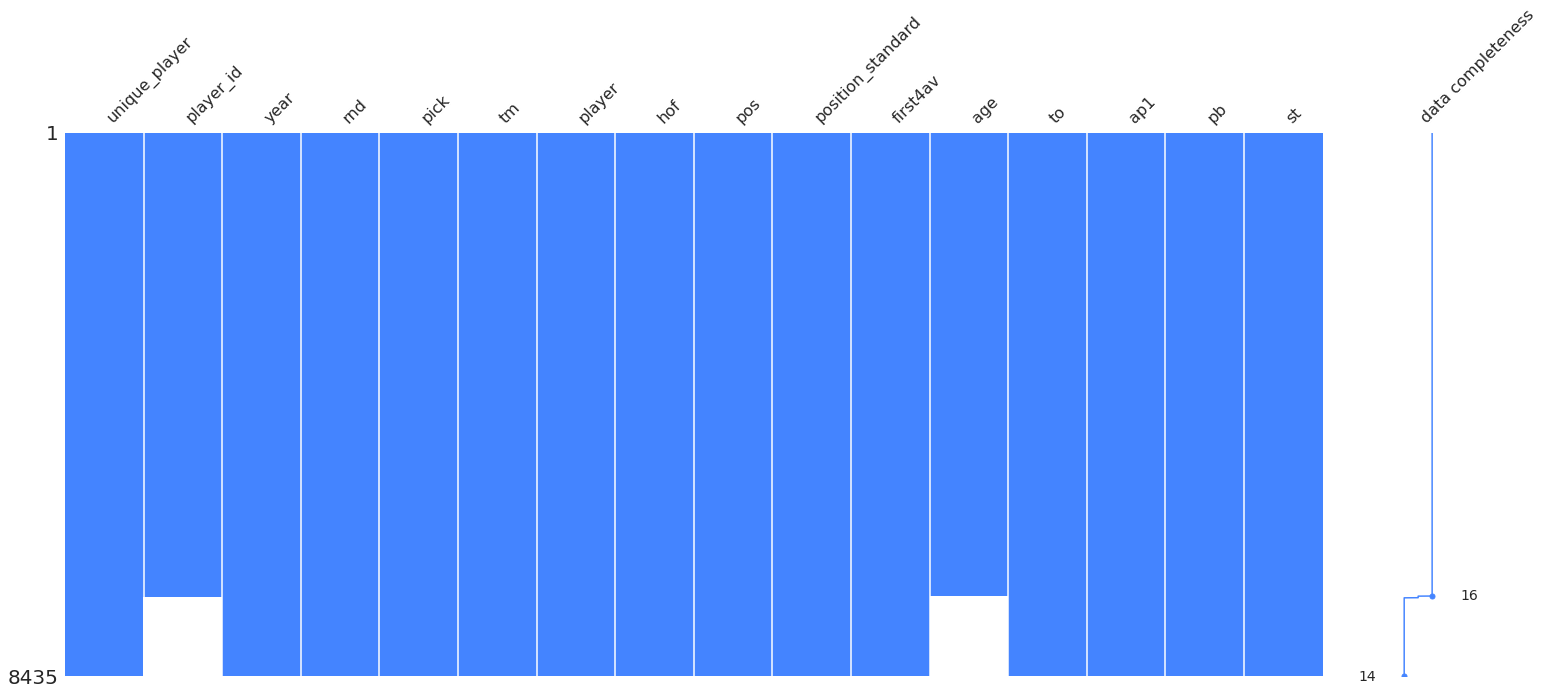

In [ ]:
missing_values(df)

In [ ]:
df.to_csv("periodic_backup.csv")

In [ ]:
# d) Impute Values (Small Holes)
# df['CustomerID'].fillna('Missing', inplace=True)

# Replace NaN one column with the median
# df['col1'] = df['col1'].fillna(df['col1'].median())
# df = df.fillna(df.median())

# to see categorical encoding - see:  https://github.com/fenago/eda/blob/main/Cars_XGBoost.ipynb

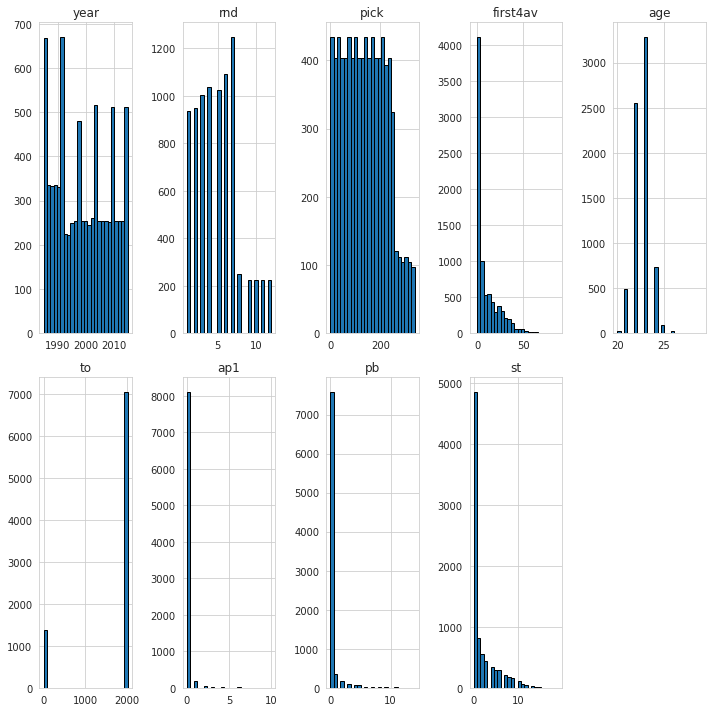

In [ ]:
# 4. Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(10, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();